<a href="https://colab.research.google.com/github/yeokyungkim/hello-world-/blob/main/Fashion_Data_Science_Natalia_Yeokyung_Kim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5/25/2021 Class Examples

In [ ]:
import requests
url = "http://google.com/search?q=hello"
response = requests.get(url)
#response.content
#response.headers
type(response.content)

bytes

In [ ]:
import requests
url = "http://google.com/search?q=data science"
response = requests.get(url)
response.text.find("data science - Google Search")

160

In [ ]:
import requests
import json

url = "http://google.com/search?q=something else"
response = requests.get(url)
response.text.find("something else - Google Search")
#response.content
#response.headers
#type(response.content)

isJson = response.headers['Content-Type'].find('json') != -1
print(isJson)

if isJson: json.loads(response.text)

False


In [ ]:
import json

url = "https://api.github.com/events"
response = requests.get(url)
isJson =response.headers['Content-Type'].find('json') != -1
print(isJson)

if isJson: data = json.loads(response.text)
#data = response.text
len(data)
data[-1]['actor']['display_login']

True


'pull'

In [ ]:
from bs4 import BeautifulSoup
import requests
import json

url = "http://google.com/search?q=something else"
response = requests.get(url)

cnt_type = response.headers['Content-Type']
isJson = cnt_type.find('json') != -1

print(isJson)

if isJson: json.loads(response.text)

False


In [ ]:
review a code introduced in class


**06/01/2021 Class Exercises**

Fashion Designers Database
https://en.wikipedia.org/wiki/List_of_fashion_designers

To collect data about all the fashion designers. 

In [ ]:
# fetch wikipedia page
import requests
from bs4 import BeautifulSoup
from bs4 import Tag

url = "https://en.wikipedia.org/wiki/List_of_fashion_designers"
r = requests.get(url)

soup = BeautifulSoup(r.text, 'html.parser')

#print(soup.prettify())
h2 = soup.find_all('h2')
countries = {}

for c in h2:
  #print(c.next_element)
  #check if find child returns None
  child = c.findChild()
  if child != None:
    #the child element is now <span>
    #get the country name from <span> tag
   print(child.contents[0])

   # add the country to the dictionary
   countries[child.contents[0]] = []

   #extract fashion designers using <li> tag
   #for designer in c.find_all_next('li'):
     #print(designer.contents)
   divs = c.findNextSibling('div')

   #for designer in divs.find_all('a'):
     #print('* ' + designer.contents[0])

   for li in divs.find_all('li'):
     for designer in li:
       if isinstance(designer, Tag):
         print('* ' + designer.string)
         countries[child.contents[0]].append(designer.string)
       else:
         print('* ' + designer)
         countries[child.contents[0]].append(designer)
   break
print(countries)

   
   

Argentina
* Aitor Throup
* Concepción Cochrane Blaquier
* Dalila Puzzovio
* Delia Cancela
* Franc Fernandez
* Gustavo Cadile
* Jazmín Chebar
* Paco Jamandreu
* Pilar Zeta
* Vanessa Seward
{'Argentina': ['Aitor Throup', 'Concepción Cochrane Blaquier', 'Dalila Puzzovio', 'Delia Cancela', 'Franc Fernandez', 'Gustavo Cadile', 'Jazmín Chebar', 'Paco Jamandreu', 'Pilar Zeta', 'Vanessa Seward']}


In [ ]:
#list
l = [1,2,3,4,5]
print(l[0])
print(l[-1])
print(l[-2])
print(l[1:3])
print(l[:3])

#dictionary
d = {'q':0.25, 'd':0.1, 'n':0.05, 'p':0.01}
print(d['q'])
print(d['e']) # 'e' is not in the list. --> key error

1
5
4
[2, 3]
[1, 2, 3]
0.25


KeyError: ignored

In [ ]:
isinstance('5',int)


False

****Lecture 3: June 2nd, 2021 Homework (Deadline June 7th, 2021)****

*   Scraping


Instructions
The goal of this assignment is to scrape the data from these pages using python and the libraries related to scraping. The links below are wikipedia pages about footwear designers, fashion events and jewellery designers. Review these wikipedia pages to determine if the names of the designers/events and country data can be retrieved from these pages. Describe your strategy for each web page and write a python script to retrieve the data. Print the data collected in google colab so that the data can be verified.

Wikipedia Pages
Footwear Designers: https://en.wikipedia.org/wiki/List_of_footwear_designers
Fashion Events: https://en.wikipedia.org/wiki/List_of_fashion_events
Jewellery Designers: https://en.wikipedia.org/wiki/List_of_jewellery_designers
Submit your assignment by sharing your google colab document with the email address praveeng@andrew.cmu.edu

The deadline for this assignment is Jun 7, 2021.

**Exercise 1** (Option 1): Scraping  Retrieve a list of jewellery designers by country from origianl HTML source using beautifulsoup

https://en.wikipedia.org/wiki/List_of_jewellery_designers 



In [ ]:
# fetch wikipedia page
import requests
from bs4 import BeautifulSoup
from bs4 import Tag

url = "https://en.wikipedia.org/wiki/List_of_jewellery_designers"
r = requests.get(url)

soup = BeautifulSoup(r.text, 'html.parser')

# print(soup.prettify())

countries = soup.find_all('h2')

# print(countries)


for c in countries:
  # check if find child returns None
  child = c.findChild()
  # print(child)
  if child != None:
    # the child element is now <span>
    # get the country name from <span> tag
    print(child.contents[0])

    
    #extract jewellery designers using <li> tag
    uls = c.find_next_sibling('ul')
  
    for jewellery_designer in uls.find_all('a'):
      if type(jewellery_designer) != None :
        print('*' + jewellery_designer.contents[0])
       



    
        
      
          
 
        

Argentina
*Ricardo Basta
Australia
*Joanna Angelett
*Wilfrid Nelson Isaac
*Alice Elsie Reeve
Austria
*Ingo Appelt
*Elena Kriegner
*Nettie Rosenstein
*Daniel Swarovski
Belgium
*Lodewyk van Bercken
*Philippe Van Dievoet
Brazil
*Kim Poor
*Fernando Jorge
Canada
*Lois Betteridge
*H.V. Dalling
*Charles Edenshaw
*David Neel
*Bill Reid
*Tobi Wong
*Dean Davidson
Czech Republic
*George Brooks
*Julie Wimmer
Denmark
*Joachim Matthias Wendt
Dominican Republic
*Jenny Polanco
*[1]
Estonia
*Mari Käbin
*Kadri Mälk
France
*Ilias Lalaounis
*Elena Votsi
*Sotirios Voulgaris
Germany
*Ilias Lalaounis
*Elena Votsi
*Sotirios Voulgaris
Greece
*Ilias Lalaounis
*Elena Votsi
*Sotirios Voulgaris
Guyana
*Vannetta Seecharran
Hong Kong
*Wallace Chan
Hungary
*Zoltan David
India
*Waris Ahluwalia
*Farah Khan Ali
*Khailshanker Durlabhji
*Shantidas Jhaveri
*Neelam Kothari
*Nayna Mehta
*Sudha Pennathur
*Suhani Pittie
*Ambaji Shinde
Ireland
*Slim Barrett
*Melissa Curry
Israel
*Dorrit Moussaieff
Italy
*Yasuki Hiramatsu
*Kimik

AttributeError: ignored

**Exercise 1** (Option 2): Scraping Retrieve a list of jewellery designers by country from origianl HTML source using beautifulsoup

https://en.wikipedia.org/wiki/List_of_jewellery_designers

In [ ]:
# fetch wikipedia page
import requests
from bs4 import BeautifulSoup
from bs4 import Tag

url = "https://en.wikipedia.org/wiki/List_of_jewellery_designers"
r = requests.get(url)

soup = BeautifulSoup(r.text, 'html.parser')

# print(soup.prettify())

countries = soup.find_all('h2')

# print(countries)


for c in countries:
  # check if find child returns None
  child = c.findChild()
  # print(child)
  if child != None:
    # the child element is now <span>
    # get the country name from <span> tag
    if child.contents[0] == "See also":
      break
    print(child.contents[0])
  

    
    #extract jewellery designers using <li> tag
    uls = c.find_next('ul')
    #print(uls)
    
    for jewellery_designer in uls.children:
     if isinstance(jewellery_designer, Tag):
      if jewellery_designer.string != None:
       print('* ' + jewellery_designer.string)
     #else:
      #print('* ' + jewellery_designer)
          

       


Argentina
* Ricardo Basta
Australia
* Joanna Angelett
* Wilfrid Nelson Isaac
* Alice Elsie Reeve
Austria
* Ingo Appelt
* Elena Kriegner
* Nettie Rosenstein
* Daniel Swarovski
Belgium
* Lodewyk van Bercken
* Philippe Van Dievoet
Brazil
* Kim Poor
* Fernando Jorge
Canada
* Lois Betteridge
* H.V. Dalling
* Charles Edenshaw
* David Neel
* Bill Reid
* Tobi Wong
* Dean Davidson
Czech Republic
* George Brooks
* Julie Wimmer
Denmark
* Joachim Matthias Wendt
Dominican Republic
Estonia
* Mari Käbin
* Kadri Mälk
France
* Louis Aucoc
* Dominique Aurientis
* Guy Bedarida
* Suzanne Belperron
* Marcel Boucher
* Frédéric Boucheron
* Jacques-Théodule Cartier
* Pierre C. Cartier
* Dolly Cohen
* Jean-Baptiste Fossin
* James de Givenchy
* Robert Goossens
* Jade Jagger
* René Sim Lacaze
* René Lalique
* Jean Mayeur
* Robert Mazlo
* Jean-Valentin Morel
* Alexandra Nereïev
* Marie-Etienne Nitot
* Sebastien Parfait
* Paloma Picasso
* Jacques von Polier
* Alexandre Reza
* Fred Samuel
* Jean Schlumberger
* Lea 

**Exercise 2**: Scraping - Retrieve a list of fashion events 1) first by continent; 2) then, by country from origianl HTML source using beautifulsoup

https://en.wikipedia.org/wiki/List_of_fashion_events 





In [ ]:
# fetch wikipedia page
import requests
from bs4 import BeautifulSoup
from bs4 import Tag

url = "https://en.wikipedia.org/wiki/List_of_fashion_events"
r = requests.get(url)

soup = BeautifulSoup(r.text, 'html.parser')

# print(soup.prettify())

continents = soup.find_all('h2')[1:6] # clean up: to avoid showing details, e.g., notes, see also etc.

for c in continents:
  #check if find child returns None
  child = c.findChild()
  if child != None:
    #the child element is now <span>
    #get the continent name from <span> tag
    print(child.contents[0])
    print()
    
countries = soup.find_all('h3')
#list(countries)
for c in countries:
  # check if find child returns None
   child = c.findChild()
   if child != None:
    # the child element is now <span>
    # get the country name from <span> tag
    if child.contents == ['Personal tools']:
      break
    print(child.contents)
     
    #extract fashion events using <li> tag
    uls = c.find_next_sibling('ul')
    for fashion_events in uls.find_all('a'):
      if type(fashion_events in uls.find_all('a')) != None :
       print("* " + fashion_events.contents[0])
 








Africa

America

Asia

Europe

Oceania

['Algeria']
* Algiers Fashion Week
* Oran Fashion Week
['Botswana']
* Gaborone Fashion Weekend
[]
* Cote d' Ivoire Fashion Week
['Egypt']
* Cairo Fashion Festival
* Cairo Couture Collections
* Cairo Fashion Week
* La Mode A Beyrouth - Cairo
['Ethiopia']
* Hub of Africa! Fashion Week
['Kenya']
* Nairobi Fashion Week
['Malawi']
* Fashion Malawi Edition
['Nigeria']
* Hayati Fashion Week
* Lagos Fashion Week
* Kwara Fashion Week
* Port Harcourt International Fashion Week
['South Africa']
* South African Fashion Week
* AFI Fashion Week
* Soweto Fashion Week
['Argentina']
* Buenos Aires Fashion Week
* Cordoba Fashion Week
* Mendoza Fashion Week
* Santa Fe Fashion Week
['Bolivia']
* Bolivia Fashion Week
* International Fashion Week Bolivia
['Brazil']
* Minas Trend Preview
* Brasília Fashion Week
* Fortaleza Fashion Week
* Amazônia Fashion Week
* Rio Fashion Week
* Salvador de Bahia Black Fashion Week
* São Paulo Fashion Week
['Canada']
* Alberta Fashion

**Exercise 3:** Scraping - Retrieve a list of footwear designers from origianl HTML source using beautifulsoup

https://en.wikipedia.org/wiki/List_of_footwear_designers

In [ ]:
# fetch wikipedia page
import requests
from bs4 import BeautifulSoup
from bs4 import Tag

url = "https://en.wikipedia.org/wiki/List_of_footwear_designers"
r = requests.get(url)

soup = BeautifulSoup(r.text, 'html.parser')

#print(soup.prettify())

#extract footwear designers using <li> tag
shoe_designers = soup.find_all('li')
for shoe_designer in shoe_designers:
  if shoe_designer.contents[0]["title"] == "List of fashion designers":
    break
  print("* " + shoe_designer.contents[0]["title"])





* Alberta Ferretti
* Aldo Group
* Alexander Wang (designer)
* Alexander White (designer)
* Alexandre Birman
* André Perugia
* Badgley Mischka
* Balenciaga
* Bally Shoe
* Balmain (fashion house)
* Beatrix Ong
* Bebe Stores
* Betsey Johnson
* Bionda Castana
* Blufin
* Bottega Veneta
* Brian Atwood
* Bruno Magli
* Calvin Klein
* Cesare Paciotti
* Chanel
* Charlotte Olympia
* Christian Dior
* Christian Lacroix
* Christian Louboutin
* Christian Siriano
* Chuck Taylor (salesman)
* Collin Thompson
* Common Projects
* Dean and Dan Caten
* Dolce & Gabbana
* Edward Rayne
* Emilio Pucci
* Emma Hope
* Fendi
* Giambattista Valli
* Giuseppe Zanotti
* Givenchy
* Gucci
* Guess (clothing)
* Hervé Leger
* Irregular Choice
* Jimmy Choo
* John Fluevog
* Joker's Closet
* Kurt Geiger
* L.A.M.B.
* Lanvin (company)
* Liam Fahy
* Louis Vuitton
* Manolo Blahnik
* Maud Frizon
* Miu Miu
* Monika Chiang
* Monique Lhuillier
* Moya Bowler
* Natacha Marro
* Nicholas Kirkwood
* Nine West
* Olga Peterson
* Patrick Cox


06/08/2021 Class Exercises

Learning Goals
1. Index and slice into strings to break them up into parts
2. Use for loops to loop over string by index
3. Use string operations and menthods to solve problems

Data structures are used while programming to organize multiple pieces of data in different ways. Examples are strings, lists, dictionaries, trees and graphs

In [ ]:
s = "hello"
print('Print char in string using index')
print(s[0])
print(s[1])
print(s[-1])
print(s[-2])

print('Print the length if the string')
print(len(s))

print('Print the last character using the len function') 
s[len(s) - 1] # '-1' becuase it starts counting from 0

Print char in string using index
h
e
o
l
Print the length if the string
5
Print the last character using the len function


'o'

In [ ]:
t = "abc123"
#"a"
t[0]
#"c"
t[2]
#"3"
t[5]

'3'

The code below is an example of string slicing. 

In [ ]:
# String slicing
t = "abc123def456"
print(t[0:3]) # sub string

print(t[3:]) # print till the end if it doesn't indicite the end of the string

print(t[0:len(t):2]) # start:end:skip count (step size) *default step size = 1 if not specified

print(t[::2]) # equal to t[0:len(t):2]

t = "abcdefghij"
print(t[2:len(t):3]) #cfi
print(t[2::3])

abc
123def456
ac2df5
ac2df5
cfi
cfi


Loop over strings or lists

In [ ]:
count = 0
print("Count befire the loop", count)
for x in range(10,15):
  count = count + x #update count by adding x
  #pass # --> do nothing 
  print("Count after each iteration", count, x)
print("Count after the loop", count)

Count befire the loop 0
Count after each iteration 10 10
Count after each iteration 21 11
Count after each iteration 33 12
Count after each iteration 46 13
Count after each iteration 60 14
Count after the loop 60


In [ ]:
t = "Wow!! This is so! exciting!!!"

count = 0
for i in range(len(t)): 
  print(i,t[i])
  if t[i] == '!':
   count = count + 1 
print("The count of ! is: ", count)

0 W
1 o
2 w
3 !
4 !
5  
6 T
7 h
8 i
9 s
10  
11 i
12 s
13  
14 s
15 o
16 !
17  
18 e
19 x
20 c
21 i
22 t
23 i
24 n
25 g
26 !
27 !
28 !
The count of ! is:  6


In [ ]:
t = "Wow!! This is so! exciting!!!"

start = 0
stop = len(t)

count = 0
for i in range(start, stop): 
  print(i,t[i])
  if t[i] == '!':
   count = count + 1 
print("The count of ! is: ", count)

0 W
1 o
2 w
3 !
4 !
5  
6 T
7 h
8 i
9 s
10  
11 i
12 s
13  
14 s
15 o
16 !
17  
18 e
19 x
20 c
21 i
22 t
23 i
24 n
25 g
26 !
27 !
28 !
The count of ! is:  6


In [ ]:
for i in range(5):
 print(i)

0
1
2
3
4


In [ ]:
for i in range(5):
  #print(i)
  i=i+1
  print(i)

1
2
3
4
5


## Trace table practice 

In [ ]:
s = "abccba"
print("Length of the string is: ", len(s))
for i in range(len(s)):
  print(i, s[i], s[len(s) - 1 -i], s[i] != s[len(s) - 1 -i])
  if s[i] != s[len(s) - 1 -i]:
   print("It is not a palindrome")
   break

Length of the string is:  6
0 a a False
1 b b False
2 c c False
3 c c False
4 b b False
5 a a False


In [ ]:
'a' != 'b'

True

In [ ]:
"hello " + "world"

'hello world'

In [ ]:
"hello " * 3

'hello hello hello '

In [ ]:
'a' in 'apple'

True

In [ ]:
'a' < 'b' # ascii value 

True

In [ ]:
'bad'< 'bat'

True

In [ ]:
'bad' > 'batter' # it will check until the condition is met and compare and stop.

False

In [ ]:
s = '123'
s.isdigit()

True

In [ ]:
s = 'ifa'
s_new = s.capitalize()
s_uppercase = s.upper()

print(s_new)
print(s)
print(s_uppercase)

Ifa
ifa
IFA


In [ ]:
s = 'apple'
print(s.count('p')) #count how many # of P in s
print("number of occurances of pp: ", s.count('pp'))
print("find the index of: ", s.find('le')) # because 'le' starts with index 3 
print("find the index of: ", s.find('lex')) # return -1 if sub is not found 

2
number of occurances of pp:  1
find the index of:  3
find the index of:  -1


In [ ]:
#find the first name in a given full name

name = "praveen garimella"

name = "andy moore"

name = "adfasdfa"

# how to identify the index of space
# print(name.find(' '))
name[0:name.find(' ')] # first name
name[name.find(' ') + 1:] # last name 

'adfasdfa'

### variables and objects (June 15, 2021)

In [ ]:
# using and updating variables

x = 5
y = x - 2
x = x - 1 # overwrite the previous x value

print("x: ", x)

x:  4


In [ ]:
# python is sequential

print(foo)
foo = 42 # reverse the order to make it work (move to line 2)

NameError: ignored

In [ ]:
#another example
a =4
b = a-2
a = a+1
b = 7

print("a: ", a)
print("b: ", b)

a:  5
b:  7


In [ ]:
# finding data types using type function
print("type of a: ", type(a))
b = 2.7
print("type of b: ", type(b))
c = "hello"
print("type of c: ", type(c))
d = True
print("type of d: ", type(d))
e = []
print("type of e: ", type(e))
f = {}
print("type of f: ", type(f))
g = set()
print("type of g: ", type(g))
h = None
print("type of h: ", type(h))

z = a + b
print("a as int: ", a)
a = float(a)
print("a as float: ", a)
print("z: ", z)
print("z: ", int(z)) # convert float to int
print("a + b: ", type(z))

z = str(a) + c
print("a + c: ", z)

type of a:  <class 'float'>
type of b:  <class 'float'>
type of c:  <class 'str'>
type of d:  <class 'bool'>
type of e:  <class 'list'>
type of f:  <class 'dict'>
type of g:  <class 'set'>
type of h:  <class 'NoneType'>
a as int:  5.0
a as float:  5.0
z:  7.7
z:  7
a + b:  <class 'float'>
a + c:  5.0hello


In [ ]:
# check if z is a string
z = "hi"
print(isinstance(z, str))

True


In [ ]:
# functions vs methods (refer to python.doc built in functions)

#result = type(a) #input #function
result = isinstance(a, str)
print("result: ", result)    #output
print("type of result: ", type(result))
print("type of a: ", type(a)) #composing multiple functions together

# c.upper() #method -> similar to function but have different structure 
result = c.upper() # if it were a function, it would have been "upper(c)"
result = a.upper()
print("result of upper: ", result)

result:  False
type of result:  <class 'bool'>
type of a:  <class 'float'>


AttributeError: ignored

Learning Goals
1. Read and write code using 1D and 2D lists
2. Use list methods to change lists 

In [ ]:
# an empty list
a = []
print("items in list are: ", a)
a = ["one", "two", "three"]
print("items in list are: ", a)
a = [1, "two", 3.0] # you can have mixed types of data in the list
print("items in list are: ", a)

items in list are:  []
items in list are:  ['one', 'two', 'three']
items in list are:  [1, 'two', 3.0]


In [ ]:
a = [1,2] + [3,4]
print("items in list are: ", a) # combine to a single list
a = ["a", "b"] * 3
print("items in list are: ", a)
x = [1,5] < [2,4] #comparing the first value of the list
print("result of comparing two lists: ", x)
y = [1,5] < [1,4]
print("result of comparing two lists: ", y)
z = [1,4] == [1,4]
print("result of comparing two lists: ", z)
w = [1,4,5] == [1,4]
print("result of comparing two lists: ", w)
x = 4 in [1,2,3]
print("membership of item in the list: ", x)

s = "hello"
print("the third char of s: " + s[1])
print("the third char of s: " + s[:4])

l = [1,2,3,4,-1,7,10,3,3,3]
print("index of the list: ", l[-1]) # last item on the list
print("index of the list: ", l[:]) #compelete list 

items in list are:  [1, 2, 3, 4]
items in list are:  ['a', 'b', 'a', 'b', 'a', 'b']
result of comparing two lists:  True
result of comparing two lists:  False
result of comparing two lists:  True
result of comparing two lists:  False
membership of item in the list:  False
the third char of s: e
the third char of s: hell
index of the list:  3
index of the list:  [1, 2, 3, 4, -1, 7, 10, 3, 3, 3]


In [ ]:
# the following functions work on lists
print("length of the list is: ", len(l))
print("min value in the list is: ", min(l))
print("max value in the list is: ", max(l))
print("sum value in the list is: ", sum(l)) # add up all the values

# there are a few methods for lists
print("return the number of times 3 repeats in the list: ", l.count(3))
print("index of max int he list: ", l.index(max(l)))

length of the list is:  10
min value in the list is:  -1
max value in the list is:  10
sum value in the list is:  35
return the number of times 3 repeats in the list:  4
index of max int he list:  6


In [ ]:
# loopinng over lists

print("l:", l)
l = [1,2,3,4,5]
mean = sum(l)/len(l)
print("mean: ", mean)

l: [1, 2, 3, 4, 5]
mean:  3.0


In [ ]:
print("l:", l)
print() # print blank line
l = [11,21,31,41,51]

sum = 0
for i in l: 
  sum = sum + i
  print(i, sum)
print("sum of numbers in l is: ", sum)
mean = sum/ len(l)
print("mean: ", mean)

l: [11, 21, 31, 41, 51]

11 11
21 32
31 63
41 104
51 155
sum of numbers in l is:  155
mean:  31.0


In [ ]:
l = ['a', 'b', 'c', 'd', 'e']

# write a loop to print the items 
# that are in the even numbered index

for i in range(len(l)):
  if i % 2 == 0: # modulo - balance(remainder of division) is equal to 0
    print(l[i])

a
c
e


In [ ]:
l = ['a', 'b', 'c', 'd', 'e']

# write a loop to print the items 
# that are in the odd numbered index

for i in range(len(l)):
  if i % 2 != 0: # modulo - balance(remainder of division) is not equal to 0
    print(l[i])

b
d


In [ ]:
x = ["a", "b", 1 , 2]
print(x[1])

s = "" # empty string
for i in range(len(x)):
  print("i is: ", i)
  print("x[i] is: ", x[i])
  print("s is: ", s)
  s = s + str(x[i])
  print()
print("s after for loop: ", s)

b
i is:  0
x[i] is:  a
s is:  

i is:  1
x[i] is:  b
s is:  a

i is:  2
x[i] is:  1
s is:  ab

i is:  3
x[i] is:  2
s is:  ab1

s after for loop:  ab12


In [ ]:
# 2D list (2 dimensional list) # lists of the lists (nested list)- example: table data

baby_names = [
              ["Jacob", 1, "boy", 2010],
              ["Isabella", 1, "girl", 2010],
              ["Ethan", 2, "boy", 2010],
              ["Michael", 3, "boy", 2010]
              ]
print(baby_names)
print(baby_names[1])
print(baby_names[1][0])

print("len of outer list: ", len(baby_names)) #outer list has 3 inner lists
print("len of inner list: ", len(baby_names[0])) #length of the particular row 

[['Jacob', 1, 'boy', 2010], ['Isabella', 1, 'girl', 2010], ['Ethan', 2, 'boy', 2010], ['Michael', 3, 'boy', 2010]]
['Isabella', 1, 'girl', 2010]
Isabella
len of outer list:  4
len of inner list:  4


In [ ]:
# looping over 2D lists

for i in range(len(baby_names)):
 print("row ", i+1 , ": ", baby_names[i])

row  1 :  ['Jacob', 1, 'boy', 2010]
row  2 :  ['Isabella', 1, 'girl', 2010]
row  3 :  ['Ethan', 2, 'boy', 2010]
row  4 :  ['Michael', 3, 'boy', 2010]


In [ ]:
count = 0
for i in range(len(baby_names)):
  if baby_names[i][2] == 'boy':
    count = count + 1
print (count)

3


In [ ]:
print(l)
l.append('x') # item is added to the end of the list
print(l)
l.insert(-2, 'f')
print(l)
l.insert(0, 'z')
print(l)

['z', 'a', 'b', 'c', 'd', 'e', 'f', 'x']
['z', 'a', 'b', 'c', 'd', 'e', 'f', 'x', 'x']
['z', 'a', 'b', 'c', 'd', 'e', 'f', 'f', 'x', 'x']
['z', 'z', 'a', 'b', 'c', 'd', 'e', 'f', 'f', 'x', 'x']


In [ ]:
print(l)
print()

for i in range(len(l)):
  print(i, l[i], l.count(l[i]))
  if l.count(l[i]) > 1: # if there is a duplicate, count value will be greater than 1
    l.remove(l[i])

    # to handle the index out of range error
    if i == len(l) - 1: # because index starts from 0
      break
 

print() 
print(l)

['z', 'z', 'a', 'b', 'c', 'd', 'e', 'f', 'f', 'x', 'x']

0 z 2
1 a 1
2 b 1
3 c 1
4 d 1
5 e 1
6 f 2
7 x 2

['z', 'a', 'b', 'c', 'd', 'e', 'f', 'x']


In [ ]:
x = [1,2,3,4]
x.count(1)

1

In [ ]:
x = [1,2,3]
x[4]

IndexError: ignored

In [ ]:
l.sort()
print(l)

['a', 'b', 'c', 'd', 'e', 'f', 'x', 'z']


In [ ]:
# immutable data types    # immutable data cannot be changed but can be replaced. 

s = "hola"
print(s[1])
s[1] = 't' #individual data cannot be changed. 

o


TypeError: ignored

In [ ]:
# how to create a set

t = {1,2,3,1,2,3,1,2,3}
print(t)

{1, 2, 3}


In [ ]:
# dictionary data structure (key & value pair = attribute & value pair)

students = {
    1: "abc",
    2: "def",
    3: "ghi",
    1: "xyz"
}

print(students.keys())
print(students[1])

dict_keys([1, 2, 3])
xyz


In [ ]:
# loop over dictionary   #dictionary is useful when you count items

for k in students:
  print(k, students[k])

1 xyz
2 def
3 ghi


In [ ]:
# '3 quotes' to insert a text
s = ''' 
Marjorie Madeline Henzell (born 21 September 1948) is an Australian politician. She was an Australian Labor Party member of the Australian House of Representatives from 1993 to 1996, representing the electorate of Capricornia.

Henzell graduated from the University of Melbourne with a Bachelor of Arts and Diploma of Social Studies before becoming a social worker.[1] At the time of her election to parliament, she managed a counselling service supporting the employees of two coal mines at Middlemount and Tieri outside Rockhampton, along with their associated communities.[2]

She was elected to the House of Representatives at the 1993 federal election, defeating disgraced ex-Labor MP Keith Wright, who was recontesting as an independent despite facing criminal child sex charges.[3] Henzell became the first woman MP to hold the seat in its history.[4] She later described her ability to be elected as a woman in Capricornia at that time as a "quirk of history" and that she was "only here" because of Wright's conduct. Henzell was aligned with the party's Labor Left faction.[5] She was appointed deputy chairman of the Labor caucus in 1993.[6]

As a new MP, Henzell described Question Time as "a bit of a boys' locker room" and described her own approach to parliament as a woman as "I won't sit around being patted on the head. We didn't get here to be sweet and malleable, but we can play hard ball without personal abuse."[7] She publicly criticised senior colleague John Dawkins for referring to opposition MP Kathy Sullivan as "sweetheart" in parliament in 1993.[5] In 1994, she questioned her own party's Prime Minister, Paul Keating, about his decision to personally take over the women's affairs portfolio following the resignation of Ros Kelly, asking him if he did not believe anyone in the caucus was sufficiently able; an angry Keating claimed Henzell was sexist, and Henzell expressed her annoyance at not being taken seriously over the issue.[8][5]

In 1994, as chairwoman of a federal parliamentary inquiry into the implementation of the recommendations of the Royal Commission into Black Deaths in Custody, Henzell attacked state governments for not using or inappropriately using $50 million in federal implementation funding, stating (in relation to New South Wales) that "two years down the track no service has been put into place for the people they were designed to assist", criticising the poor state of services for Aboriginal people, and stating "the only conclusion you can draw is the fact that there is a continuing abrogation of people's rights...the fact that we are tolerating this sort of racism diminishes us as a country." She also lambasted the Victorian government for failing to implement key recommendations of the Royal Commission and failing to submit reports on its implementation progress.[9][10]

In October 1994, in relation to a contentious debate on a sexual privacy bill, Henzell claimed in parliament that "we are all born bisexual", which made front-page news in the Rockhampton newspaper The Morning Bulletin and led to her receiving many angry letters from constituents; she subsequently clarified that her comment "was not referring to people's sexual orientation; it referred to the fact that we all have male and female traits and hormones and that human sexuality is a widely misunderstood subject".[11] In September 1995, she was one of several Labor MPs to speak in parliament against a bill to sell off the Australian National Line, even though she later voted for it in line with caucus solidarity rules.[12] Throughout all or most of her term, she was a member of the Joint Select Committee on Certain Family Law Issues and the House of Representatives Standing Committees on Aboriginal and Torres Strait Islander Affairs and Long Term Strategies.[1] She was defeated by National Party candidate Paul Marek at the 1996 federal election.[13]

She later relocated to Armidale in New South Wales and was an unsuccessful candidate for the Armidale Dumaresq Council in 2004.[14] She remained involved with the Labor Party and served as secretary of the party's Armidale State Electoral Council.[15]
'''

In [ ]:
t = {'later':1, 'in':5}
t['later'] += 1
# t['later'] = t['later'] + 1
print(t)

{'later': 2, 'in': 5}


In [ ]:
import re
s = "Hello!!! (World) [123]"
s = re.sub(r"!", " ", s) #pre-syntax r before the unwanted expression and replace with space (" ")
s = re.sub(r"\(", " ", s)
s = re.sub(r"\)", " ", s)
s = re.sub(r"\[", " ", s)
s = re.sub(r"\]", " ", s)
s = re.sub(r"0-9", " ", s) # get rid of numbers 
print(s)

Hello     World   123 


In [ ]:
# print(len(s)) 

# use regular express to replacce unwanted characters with spaces
s =re.sub(r"\(", " ", s)
s =re.sub(r"\)", " ", s)
s =re.sub(r"\[", " ", s)
s =re.sub(r"\]", " ", s)
s =re.sub(r"\.", " ", s)
s =re.sub(r",", " ", s)
s =re.sub(r";", " ", s)
s =re.sub(r"\'", " ", s)
s =re.sub(r"\"", " ", s)

word_list = s.split(" ") #split by space between words
print(word_list)
print("number of words in the list: ", len(word_list))

# use the word list to build a dictionary
words = {} # create an empty dictionary first

# loop over the word list
for i in range(len(word_list)) :
  w = word_list[i].strip()  # to remove white space 
  w = w.lower() # covert to lower case to maximize the chance to match words
  if w in words: # if the word is already in the list
    words[w] += 1 # increase the value by 1
  else:
    words[w] = 1

# pretty print dictionary
for k in words:
 print(k, words[k])

['', '\nMarjorie', 'Madeline', 'Henzell', '', 'born', '21', 'September', '1948', '', 'is', 'an', 'Australian', 'politician', '', 'She', 'was', 'an', 'Australian', 'Labor', 'Party', 'member', 'of', 'the', 'Australian', 'House', 'of', 'Representatives', 'from', '1993', 'to', '1996', '', 'representing', 'the', 'electorate', 'of', 'Capricornia', '\n\nHenzell', 'graduated', 'from', 'the', 'University', 'of', 'Melbourne', 'with', 'a', 'Bachelor', 'of', 'Arts', 'and', 'Diploma', 'of', 'Social', 'Studies', 'before', 'becoming', 'a', 'social', 'worker', '', '1', '', 'At', 'the', 'time', 'of', 'her', 'election', 'to', 'parliament', '', 'she', 'managed', 'a', 'counselling', 'service', 'supporting', 'the', 'employees', 'of', 'two', 'coal', 'mines', 'at', 'Middlemount', 'and', 'Tieri', 'outside', 'Rockhampton', '', 'along', 'with', 'their', 'associated', 'communities', '', '2', '\n\nShe', 'was', 'elected', 'to', 'the', 'House', 'of', 'Representatives', 'at', 'the', '1993', 'federal', 'election', ''

### June 29, 2021 Class Exercises

In [ ]:
# define function (different from built in function)

def add (x,y):
    print("adding x and y") #side effect 
    print (x+y) #bad design: value - None (no return value)
    return x+y

def sub(x,y):
    return x-y

def mult(x,y):
    return x*y

r = add(5,3)
s = sub(5,3)

print(r)
print(s)

t = mult(r,s)
print(t)

print(mult(r,s)) #more compact compared to line #20

adding x and y
8
8
2
16
16


In [ ]:
def happy():
    print("Happy Birthday To You!")

def sing(P):
    happy()
    happy()
    print("Happy Birthday dear " + P + "!")
    happy()

# main
sing("Fred")

Happy Birthday To You!
Happy Birthday To You!
Happy Birthday dear Fred!
Happy Birthday To You!


**Poker Exercise**:
#inputs and outputs

## representation of the cards 

*   Ace of Hearts - A(face value)H(Suit)
*   10 of Diamond - TD
*   3 of Clubs - 3C


## respresent a poker hand 



*   h1 = [TH, JH, QH, KH, AH] 
*   h2 = [3D, 3S, 4H, 8C, AS]
*   h3 = [7D, 2S, 4H, 8C, AS]


## represent a poker hands

This is a list of lists! hands = [h1, h2, h3]

## output

1. print the winning hand

## Poker Hands Ranks

Make a list of top 10 rankings
1. High Card : Highest value card.
2. One Pair : Two cards of the same value.
3. Two Pairs : Two different pairs.
4. Three of a Kind : Three cards of the same value.
5. Straight : All cards are consecutive values.
6. Flush : All cards of the same suit.
7. Full House : Three of a kind and a pair.
8. Four of a Kind : Four cards of the same value.
9. Straight Flush : All cards are consecutive values of same suit.
10. Royal Flush : Ten, Jack, Queen, King, Ace, in same suit.

Define test cases and check with assert keyword

In [ ]:
# add the numbers x and y
def add(x, y):
  return x + y

In [ ]:
def add_test():
  assert add(2, 3) == 5
  assert add(0, 0) == 0
  assert add(1, -2) == -1
  print("all tests passed!")
add_test()

all tests passed!


Define test cases for poker function

Code for evaluating poke hands (WIP)



In [ ]:
def card_ranks(hand):
  cards = hand.split()
  faceValues = []
  for card in cards:
    #print(card[0])
    cardOrder = '0123456789TJQKA'  
    #print(card[0], cardOrder.index(card[0])
    value = cardOrder.index(card[0])
    faceValues.append(value)
    print(sorted(faceValues, reverse=True))

#print(card_ranks("AH TH 3H 4H 8H"))

def card_ranks_test():
  assert card_ranks("AH TH 3H 4H 8H") == [14, 10, 3, 4, 8]
  assert card_ranks("2H 5H 3H 4H 8H") == [8, 5, 4, 3, 2]
  assert card_ranks("KH QH JH AH TH") == [14, 13, 12, 11, 10]
  print("all test cases passed!")

card_ranks_test()


[14]
[14, 10]
[14, 10, 3]
[14, 10, 4, 3]
[14, 10, 8, 4, 3]


AssertionError: ignored

In [ ]:
def flush(hand):
  #convert the string to list of cards
  #split on space
  cards = hand.split()

  #create a set to hold all the suits 
  suits = set()

  #loop over the cards and add suits to set 
  for card in cards:
    suits.add(card[1])

    #return true if len of suits is 1
    #false otherwise
  return len(suits) == 1

In [ ]:
def straight(hand):
  # get the face values of the cards
  # by calling the card_ranks function
  ranks = card_ranks(hand)

  # check if the card ranks are unique
  # by adding them to a set
  # if the len of set is not 5 then it is not a straight
  # and
  # if the max - min of the ranks is not 4
  # it is not a straight
  if len(set(ranks)) == 5 and (max(ranks) - min(ranks) == 4):
    return True 
  return False

def straight_test():
  assert straight("AS TS 3S 4S 8S") == False
  assert straight("2S 3S 4S 5S 6S") == True
  assert straight("AS TS QS JS KS") == True
  assert straight("AS 3S 4S 5S 6S") == False
  # add more tests to check for correctness
  print("all tests passed!")

straight_test()

[14]
[14, 10]
[14, 10, 3]
[14, 10, 4, 3]
[14, 10, 8, 4, 3]


TypeError: ignored

In [ ]:
def kind(hand, n):
  ranks = card_ranks(hand)
  for rank in ranks:
    if ranks.count(rank) == n:
      return True
  return False 

def kind_test():
  assert kind("KH KD KS QH JD", 3) == True
  assert kind("KH KD KS QH JD", 4) == False
  assert kind("KH KD KS KC JH", 4) == True
  assert kind("2C 2H 3S 4D 5H", 2) == True
  assert kind("2C 2H 2S 4D 5H", 2) == False
  print("all tests passed")

kind_test()

[13]
[13, 13]
[13, 13, 13]
[13, 13, 13, 12]
[13, 13, 13, 12, 11]


TypeError: ignored

In [ ]:
# function to return the rank of the hand 
def hand_rank(hand): # to evaluate the ranks of hands #Pseudo Code
  ''' 
   if hand is straight and hand is flush
  '''
  if straight(hand) and flush(hand):
    return 9
  elif kind(hand, 4):
    return 8
  elif kind(hand, 3) and kind(hand, 2):
    return 7
  elif flush(hand):
    return 6
  elif straight(hand):
    return 5
  elif kind(hand, 3):
    return 4
  elif kind(hand, 2):
    return 2

  return -1

def hand_rank_test():
  sf = "2S 3S 4S 5S 6S"
  s = "AS TS QS KH JD"
  f = "TD AD 4D 8D 9D"
  k4 = "KH KD KS KC JD"
  k3 = "KH KD KS TC JD"
  k2 = "KH KD 8S TC JD"

  assert hand_rank(sf) == 9
  assert hand_rank(f) == 6
  assert hand_rank(s) == 5
  assert hand_rank(k4) == 8
  assert hand_rank(k3) == 4
  assert hand_rank(k2) == 2
  print("all tests passed!")

hand_rank_test()


[2]
[3, 2]
[4, 3, 2]
[5, 4, 3, 2]
[6, 5, 4, 3, 2]


TypeError: ignored

In [ ]:
# function to evaluate poker hands
def poker(hands):
  print(hands)
  winner = max(hands, key=hand_rank)
  return winner 

In [ ]:
def flush_test():
  #print(flush("AH TH 3H 4H 8H"))
  #print(flush("AH TH 3H 4H 8D"))
  assert flush("AH TH 3H 4H 8H") == True
  assert flush("AH TH 3H 4H 8D") == False
  assert flush("AS TS 3S 4S 8S") == True
  assert flush("AS TS 3H 4S 8S") == False 

  print("all tests passed!")

flush_test()

all tests passed!


In [ ]:
#example of set data structure
# to solve the flush function

s = set([1,2,3,4,5,1,2,4,5]) # set removes all the duplicates
print(s)

s = set(['H', 'H', 'H', 'H', 'H'])
print(s)
print(len(s))

s = set(['H', 'H', 'H', 'D', 'D'])
print(s)
print(len(s))

s = set()
print(s)
s.add('H')
print(s)
s.add('D')
print(s)
s.add('C')
print(s)
s.add('S')
print(s)
s.add('H')
print(s)
s.add('H')
print(s)

{1, 2, 3, 4, 5}
{'H'}
1
{'H', 'D'}
2
set()
{'H'}
{'H', 'D'}
{'H', 'C', 'D'}
{'H', 'C', 'S', 'D'}
{'H', 'C', 'S', 'D'}
{'H', 'C', 'S', 'D'}


In [ ]:
def poker_test():
  h1 = "TH JH QH KH AH" # string representation
  h2 = "3D 3S 4H 8C AS"
  h3 = "7D 2S 4H 8C AS"
  h4 = "7D 2S 4H 8C AS"

  assert poker([h1, h2, h3]) == h1  # winning hands
  assert poker([h2, h3]) == h2
  assert poker([h3, h4]) == h4

  # add more tests for the poker function

  print("all tests passed!")

poker_test()

['TH JH QH KH AH', '3D 3S 4H 8C AS', '7D 2S 4H 8C AS']


NameError: ignored

## Example to understand max function

In [ ]:
# this example is to understand the benefit of the key in max
# a function to count the characters in a string 
def char_count(s):
  return len(s)

# return the string that has the max length
max(["abc", "defg", "x", "pq"], key=char_count)

'defg'

## Data Visualization July 13, 2021


In [ ]:
import matplotlib.pyplot as plt


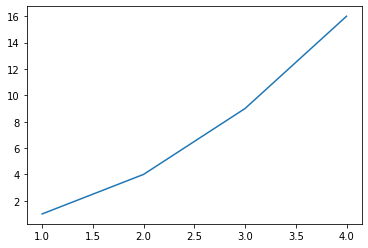

In [ ]:
plt.plot([1,2,3,4],[1,4,9,16])

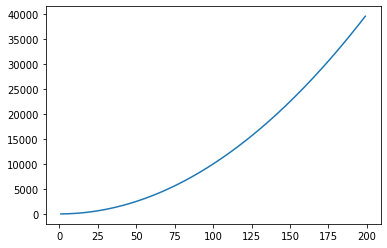

In [ ]:
x = [i for i in range(1,200)]
y = [i*i for i in range(1,200)]
plt.plot(x,y)

In [ ]:
import pandas as pd

data_file = "/content/scores.csv" #add data path inside
df = pd.read_csv(data_file)
df['Scores M']

FileNotFoundError: ignored

In [ ]:
x = df['Student ID']
y = df['Scores M']
plt.xlabel("Student ID")
plt.ylabel("Scores Math")
plt.plot(x,y)

NameError: ignored

In [ ]:
x = df['Scores M']
y = df['Scores E']

data = {
    'a':X,
    'b':Y
}
plt.scatter('a','b', data=data)
plt.xlable("Math Scores")
plt.ylabel("English Scores")

July 20, 2021 Class Exercises (Spam Filter)

step 1: Load the data and explore

In [6]:
#step 1: Load the data and explore
import pandas as pd
file = "/content/SMSSpamCollection"

data = pd.read_csv(file, sep="\t", header=None, names=['label', 'sms'])
data.head()
#data.describe()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


step 2: pre-processing

In [20]:
import string
string.punctuation

import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
stopwords[:10]
len(stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


179

In [22]:
#step 2: Pre-processing
def pre_process(sms):
  clean_sms = sms

  # lower case
  clean_sms = clean_sms.lower()

  # remove punctuations
  result = ""
  for ch in clean_sms:
    if ch in string.punctuation:
      pass
    else: 
      result += ch #append to the result 
  clean_sms = result 

  # remove stop words
  words = clean_sms.split(" ")
  result =""
  for w in words:
    if w in stopwords:
      pass
    else:
      result += w + " "
  clean_sms = result 

  return clean_sms

# apply the pre processing to the data frame
data['processed'] = data['sms'].apply(lambda x: pre_process(x))
data

,label,sms,processed
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,2nd time tried 2 contact u u £750 pound prize ...
5568,ham,Will ü b going to esplanade fr home?,ü b going esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",pity mood soany suggestions
5570,ham,The guy did some bitching but I acted like i'd...,guy bitching acted like id interested buying s...


In [24]:
#words = ['apple', 'bat', 'bat', 'bat']
words = stopwords

word_counts = {}

for w in words:
 if w in word_counts:
  word_counts[w] += 1
 else:
   word_counts[w] = 1

word_counts

{'a': 1,
 'about': 1,
 'above': 1,
 'after': 1,
 'again': 1,
 'against': 1,
 'ain': 1,
 'all': 1,
 'am': 1,
 'an': 1,
 'and': 1,
 'any': 1,
 'are': 1,
 'aren': 1,
 "aren't": 1,
 'as': 1,
 'at': 1,
 'be': 1,
 'because': 1,
 'been': 1,
 'before': 1,
 'being': 1,
 'below': 1,
 'between': 1,
 'both': 1,
 'but': 1,
 'by': 1,
 'can': 1,
 'couldn': 1,
 "couldn't": 1,
 'd': 1,
 'did': 1,
 'didn': 1,
 "didn't": 1,
 'do': 1,
 'does': 1,
 'doesn': 1,
 "doesn't": 1,
 'doing': 1,
 'don': 1,
 "don't": 1,
 'down': 1,
 'during': 1,
 'each': 1,
 'few': 1,
 'for': 1,
 'from': 1,
 'further': 1,
 'had': 1,
 'hadn': 1,
 "hadn't": 1,
 'has': 1,
 'hasn': 1,
 "hasn't": 1,
 'have': 1,
 'haven': 1,
 "haven't": 1,
 'having': 1,
 'he': 1,
 'her': 1,
 'here': 1,
 'hers': 1,
 'herself': 1,
 'him': 1,
 'himself': 1,
 'his': 1,
 'how': 1,
 'i': 1,
 'if': 1,
 'in': 1,
 'into': 1,
 'is': 1,
 'isn': 1,
 "isn't": 1,
 'it': 1,
 "it's": 1,
 'its': 1,
 'itself': 1,
 'just': 1,
 'll': 1,
 'm': 1,
 'ma': 1,
 'me': 1,
 'mightn

step 3: Categorize and count the words

In [30]:
def categorize_words():
  spam_words = []
  ham_words = []

  for sms in data['processed'][data['label'] == 'spam']:
    for word in sms.split():
      spam_words.append(word)

  for sms in data['processed'][data['label'] == 'ham']:
    for word in sms.split():
      ham_words.append(word)

  return spam_words, ham_words

spam_words, ham_words = categorize_words()

#ham_words

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amore',
 'wat',
 'ok',
 'lar',
 'joking',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'early',
 'hor',
 'u',
 'c',
 'already',
 'say',
 'nah',
 'dont',
 'think',
 'goes',
 'usf',
 'lives',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aids',
 'patent',
 'per',
 'request',
 'melle',
 'melle',
 'oru',
 'minnaminunginte',
 'nurungu',
 'vettam',
 'set',
 'callertune',
 'callers',
 'press',
 '9',
 'copy',
 'friends',
 'callertune',
 'im',
 'gonna',
 'home',
 'soon',
 'dont',
 'want',
 'talk',
 'stuff',
 'anymore',
 'tonight',
 'k',
 'ive',
 'cried',
 'enough',
 'today',
 'ive',
 'searching',
 'right',
 'words',
 'thank',
 'breather',
 'promise',
 'wont',
 'take',
 'help',
 'granted',
 'fulfil',
 'promise',
 'wonderful',
 'blessing',
 'times',
 'date',
 'sunday',
 'oh',
 'kim',
 'watching',
 'eh',
 'u',
 'remember',
 '2',
 's

step 4: Predict Function

In [46]:
def predict(sms):
  spam_counter = 0
  ham_counter = 0

  sms = pre_process(sms)
  # print("pre processed sms", sms)

  words = sms.split(" ") #split by space between words / punctuation marks / line(\n)

  for w in words:
    spam_counter += spam_words.count(w)
    ham_counter += ham_words.count(w)

  if ham_counter > spam_counter:
    accuracy = round(ham_counter/(ham_counter + spam_counter) *100, 2)
    print(sms, " is ham", accuracy)

  elif ham_counter == spam_counter:
    print(sms, " could be spam")
  else: 
    accuracy = round(spam_counter/(ham_counter + spam_counter) *100, 2)
    print(sms, " is spam", accuracy)
  print(spam_counter, ham_counter)

In [51]:
predict("Sorry, I'll call you later")
predict("the 2nd time we have tried 2 ")
predict("Free entry in 2 a wkly comp to win FA Cup")
predict("win $1000000")
predict("Beauty pass sale is on! Don't miss out on 15% off online now till 11 July.")

sorry ill call later   is ham 68.29
351 756
2nd time tried 2    is ham 69.14
229 513
free entry 2 wkly comp win fa cup   is spam 56.89
508 385
win 1000000   is spam 83.33
60 12
beauty pass sale dont miss 15 online till 11 july   is ham 89.21
48 397
